In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
# initialize the random number generator, which is used to initialize the neural network’s weights. 
torch.manual_seed(111)

The training data is composed of pairs (x₁, x₂) so that x₂ consists of the value of the sine of x₁ for x₁ in the interval from 0 to 2π.

x1 = 2 * pi * Random Number

x2 = Sin(x1)

In [3]:
train_data_length = 736
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
x1 = train_data[:,0]
train_data[:, 1] = torch.sin(train_data[:, 0])
x2 = train_data[:,1]
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]


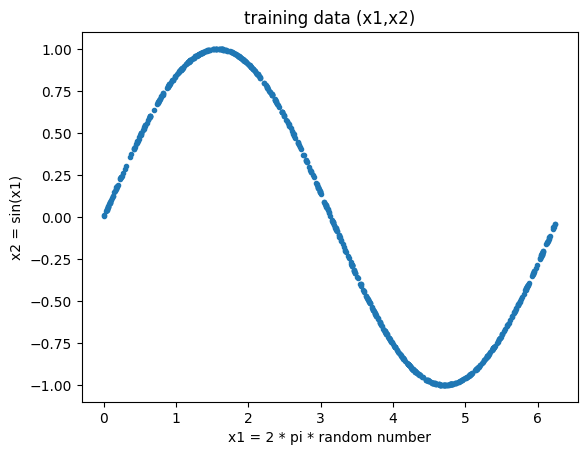

In [4]:
plt.plot(x1 , x2 , '.')
plt.xlabel('x1 = 2 * pi * random number')
plt.ylabel( 'x2 = sin(x1)')
plt.title('training data (x1,x2)')
plt.show()

In [5]:
batch_size = 16

train_loader = torch.utils.data.DataLoader(train_set , batch_size = batch_size , shuffle = True)

In [6]:
#MLP NN
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid(),

        )
        
    def forward(self , x):
        output = self.model(x)
        return output
    
discriminator = Discriminator()

In [7]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2 , 32),
            nn.ReLU(),
            nn.Linear(32 , 64) , 
            nn.ReLU(),
            nn.Linear(64 , 16),
            nn.ReLU(),
            nn.Linear(16 , 2)
        )
        
    def forward(self,x):
        output = self.model(x)
        return output

generator = Generator()

In [8]:
lr_disc = 0.001
lr_gen = 0.001
epochs = 400
loss_function = nn.BCELoss()
#binary cross-entropy function is a suitable loss function for training the discriminator because it considers a binary classification task. 
# It’s also suitable for training the generator since it feeds its output to the discriminator, which provides a binary observable output.
optimizer_discriminator = torch.optim.Adam(discriminator.parameters() , lr=lr_disc )
optimizer_generator = torch.optim.Adam(generator.parameters() , lr = lr_gen)

In [9]:
for epoch in range(epochs):
    for n, (real_samples, _) in enumerate(train_loader):

        # Data for training the discriminator

        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(

        (real_samples_labels, generated_samples_labels)

        )
        
        #training discriminator
        
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator , all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()
        
        # data for training generator
        latent_space_samples = torch.randn((batch_size , 2))
        
        #training generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated , real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()
        if epoch % 10 == 0 and n == batch_size - 1:

            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")

            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
    # generated_samples = generated_samples.detach()
    # plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

            
                

Epoch: 0 Loss D.: 0.3779238164424896
Epoch: 0 Loss G.: 1.0479415655136108
Epoch: 10 Loss D.: 0.6759976148605347
Epoch: 10 Loss G.: 1.1000003814697266
Epoch: 20 Loss D.: 0.6876890659332275
Epoch: 20 Loss G.: 0.915251612663269
Epoch: 30 Loss D.: 0.6870487332344055
Epoch: 30 Loss G.: 0.7269906401634216
Epoch: 40 Loss D.: 0.6627180576324463
Epoch: 40 Loss G.: 0.800045371055603
Epoch: 50 Loss D.: 0.3977932929992676
Epoch: 50 Loss G.: 1.3614414930343628
Epoch: 60 Loss D.: 0.6386284232139587
Epoch: 60 Loss G.: 0.6397444605827332
Epoch: 70 Loss D.: 0.598983645439148
Epoch: 70 Loss G.: 1.130861759185791
Epoch: 80 Loss D.: 0.8492042422294617
Epoch: 80 Loss G.: 0.5753262042999268
Epoch: 90 Loss D.: 0.6744756698608398
Epoch: 90 Loss G.: 1.356029748916626
Epoch: 100 Loss D.: 0.7093212008476257
Epoch: 100 Loss G.: 0.6884163022041321
Epoch: 110 Loss D.: 0.6627355813980103
Epoch: 110 Loss G.: 0.6420351266860962
Epoch: 120 Loss D.: 0.6967952847480774
Epoch: 120 Loss G.: 0.7270758152008057
Epoch: 130 Lo

In [12]:
checkpoint = {
    'epoch' : epochs,
    'generator_state_dict' : optimizer_generator.state_dict(),
    'discriminator_state_dict' : optimizer_discriminator.state_dict(),
    'loss_generator' : loss_generator,
    'loss_discriminator' : loss_discriminator   
}

torch.save(checkpoint , 'MyFirstGAN_checkpoint.pth')

In [10]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

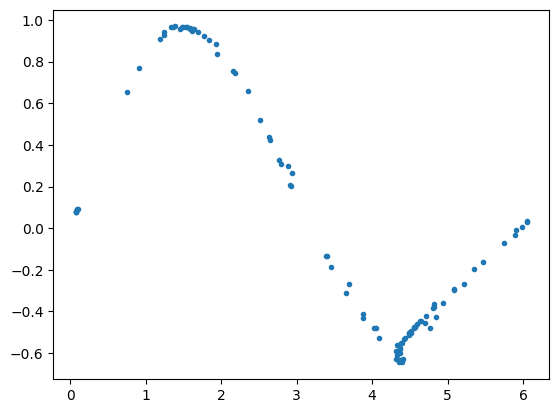

In [11]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")